In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn plotly


  Using cached numpy-2.4.2-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ----------------------- ---------------- 30.7/52.8 kB 1.4 MB/s eta 0:00:01
     ---------------------------------------- 52.8/52.8 kB 1.4 MB/s eta 0:00:00
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.8.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/116.4 kB ? eta -:--:--
     -------------------------------------- 116.4/116.4 kB 6.6 MB/s eta 0:00:00
  Using cached pillow-12.1.1-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached scipy-1.17.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 k


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/GlobalLandTemperaturesByCountry.csv")
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [11]:
# Filtrar solo Colombia
df_col = df[df["Country"] == "Colombia"].copy()

df_col.shape

df_col["dt"] = pd.to_datetime(df_col["dt"])

df_col.info()

df_col["Year"] = df_col["dt"].dt.year
df_col["Month"] = df_col["dt"].dt.month

df_col.head()


df_col.describe()



<class 'pandas.DataFrame'>
RangeIndex: 2277 entries, 114732 to 117008
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2277 non-null   datetime64[us]
 1   AverageTemperature             2077 non-null   float64       
 2   AverageTemperatureUncertainty  2077 non-null   float64       
 3   Country                        2277 non-null   str           
dtypes: datetime64[us](1), float64(2), str(1)
memory usage: 71.3 KB


,dt,AverageTemperature,AverageTemperatureUncertainty,Year,Month
count,2277,2077.000000,2077.000000,2277.000000,2277.000000
mean,1918-10-31 22:55:29.644269,24.716871,0.581472,1918.375494,6.494071
min,1824-01-01 00:00:00,22.918000,0.076000,1824.000000,1.000000
25%,1871-06-01 00:00:00,24.279000,0.268000,1871.000000,3.000000
50%,1918-11-01 00:00:00,24.692000,0.433000,1918.000000,6.000000
75%,1966-04-01 00:00:00,25.114000,0.840000,1966.000000,9.000000
max,2013-09-01 00:00:00,27.205000,3.363000,2013.000000,12.000000
std,NaN,0.629906,0.397597,54.788232,3.451087


In [12]:
df_col = df_col.dropna(subset=["AverageTemperature"])
df_col.shape


(2077, 6)

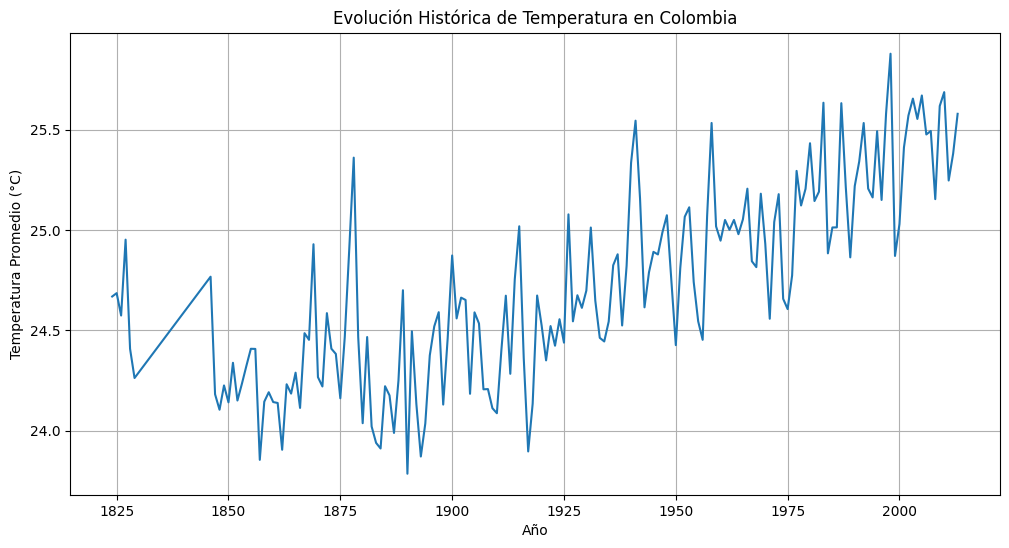

In [14]:
temp_year = df_col.groupby("Year")["AverageTemperature"].mean().reset_index()
temp_year.head()


plt.figure(figsize=(12,6))
plt.plot(temp_year["Year"], temp_year["AverageTemperature"])
plt.title("Evolución Histórica de Temperatura en Colombia")
plt.xlabel("Año")
plt.ylabel("Temperatura Promedio (°C)")
plt.grid()
plt.show()



#### **Conclusion:**

Se observa una tendencia clara de **aumento** en la temperatura promedio anual en Colombia, especialmente desde **1970**, con una aceleración notable después de **1990**, lo que es consistente con **patrones globales** de **cambio climático.**



## Visualization 2


In [15]:
pivot_temp = df_col.pivot_table(
    values="AverageTemperature",
    index="Month",
    columns="Year",
    aggfunc="mean"
)

pivot_temp.head()


Year,1824,1825,1826,1827,1828,1829,1846,1847,1848,1849,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Month,,,,,,,,,,,,,,,,,,,,,
1,25.010,25.583,NaN,26.168,23.381,24.676,25.977,25.184,23.299,24.937,...,25.820,25.737,25.223,26.087,25.230,25.120,26.465,25.421,25.143,25.695
2,24.709,25.162,23.760,25.775,23.988,24.065,25.614,25.280,25.650,24.923,...,26.390,25.994,25.963,26.757,25.433,25.393,27.045,25.326,25.453,25.493
3,25.060,25.309,24.843,25.874,25.288,24.859,26.131,23.852,24.474,25.371,...,26.556,26.606,25.621,26.038,25.634,25.203,26.804,25.108,25.510,26.038
4,24.688,25.533,24.690,25.664,24.755,24.258,23.857,24.139,24.281,23.467,...,25.476,25.894,25.355,25.470,25.403,25.470,25.869,25.120,24.977,25.874
5,24.284,24.316,25.104,25.028,24.555,24.752,24.321,23.593,23.613,23.467,...,25.245,25.640,25.106,25.277,24.919,25.415,25.938,25.121,25.334,25.370


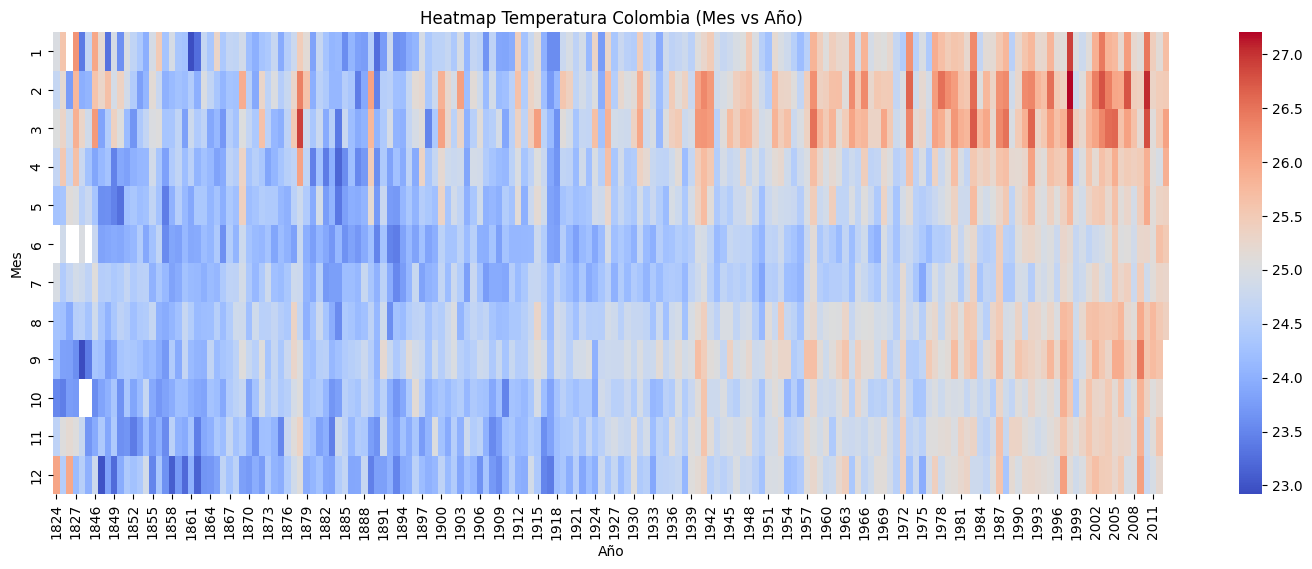

In [16]:
plt.figure(figsize=(18,6))
sns.heatmap(pivot_temp, cmap="coolwarm")
plt.title("Heatmap Temperatura Colombia (Mes vs Año)")
plt.xlabel("Año")
plt.ylabel("Mes")
plt.show()



#### **Conclusion:**

1. Cambio gradual de **azul → rojo**
    * Desde 1824 hasta ~1970 predominan tonos azules y neutros.
    * Después de 1980 aparecen muchos más tonos rojos.
Esto nos indica que existe un aumento sistemático en la temperatura mensual promedio a lo largo del tiempo.
2. Estacionalidad clara
    * Meses 1–3 (enero-marzo) son consistentemente más cálidos.
    * Meses 6–8 tienden a ser más fríos.
Esto muestra un patron estacional de manera contundente.
3. Intensificación reciente
    * Después del año 1990 casi todos los meses muestran colores más cálidos.
Esto es una señal clara del calentamiento global acumulado año tras año.




## Visu 3


In [17]:
df_col["Decade"] = (df_col["Year"] // 10) * 10
df_col.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month,Decade
114732,1824-01-01,25.010,0.888,Colombia,1824,1,1820
114733,1824-02-01,24.709,1.802,Colombia,1824,2,1820
114734,1824-03-01,25.060,1.100,Colombia,1824,3,1820
114735,1824-04-01,24.688,1.592,Colombia,1824,4,1820
114736,1824-05-01,24.284,1.177,Colombia,1824,5,1820


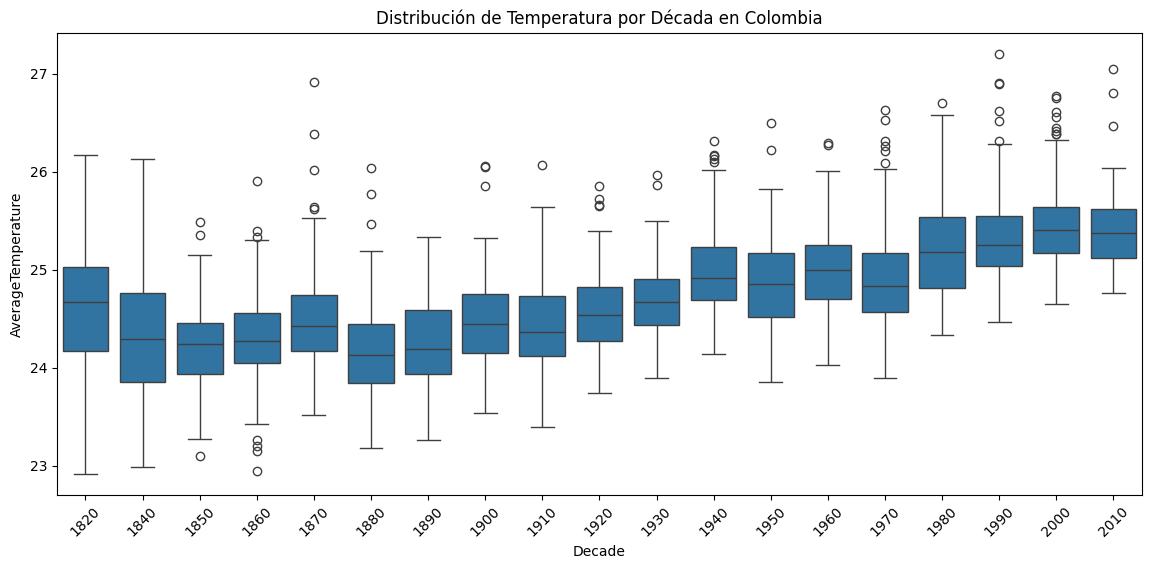

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df_col, x="Decade", y="AverageTemperature")
plt.xticks(rotation=45)
plt.title("Distribución de Temperatura por Década en Colombia")
plt.show()


#### **Conclusion:**

1. Desplazamiento progresivo hacia arriba
    Desde 1820 hasta 2010:
    * La mediana aumenta gradualmente.
    * Las cajas completas (Q1–Q3) también se desplazan hacia valores mayores.
Esto indica que no es solo un aumento puntual, sino un cambio estructural en la distribución.
2. Décadas recientes más cálidas
    Después de 1980:
    * Las medianas están claramente por encima de 25°C.
    * Aparecen más valores extremos altos (> 26°C).
Esto muestra un patron estacional de manera contundente.
3. Menor variabilidad relativa en décadas modernas
    Las cajas parecen más compactas en décadas recientes, lo que sugiere:
    * Mayor estabilidad pero en un nivel térmico más alto.



### Conclusiones Generales

El análisis histórico de la temperatura promedio en Colombia entre **1824** y **2013** muestra una tendencia clara de calentamiento progresivo.

La visualización temporal evidencia un aumento gradual, especialmente marcado después de **1970**.

El heatmap mensual confirma que este incremento ocurre de manera sistemática en casi todos los meses del año, lo que indica que no se trata de una variación estacional aislada, sino de un **cambio climático** acumulativo.

Finalmente, el análisis por décadas demuestra que toda la distribución de temperaturas se ha desplazado hacia valores mayores, evidenciando un cambio estructural en el régimen térmico del país.